In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysrt
import re
import text2emotion as t2e

from collections import defaultdict
from textblob import TextBlob



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/darusrinivasrao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/darusrinivasrao/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/darusrinivasrao/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:

def load_srt(path):
    """Method that loads the srt file"""
    # Read subtitles file
    return pysrt.open(path)


def fetch_data(subs):
    """Method that fetches text and time data from the subtitles"""
    # Fetch text values from srt file
    text = [subs[i].text for i in range(len(subs))]
    # Fetch time value from srt file
    start_time = [(subs[i].start.hours, subs[i].start.minutes, subs[i].start.seconds) for i in range(len(subs))]
    # Clean the data
    return clean_data(text), start_time


def clean_data(text):
    """Method that cleans the fetched text data"""
    # Remove <i> and </i> tags
    text = [re.sub(r'</?i>', '', line) for line in text]
    # Remove '\n' characters
    text = [re.sub('\n', ' ', line) for line in text]
    # Remove punctuations
    text = [re.sub(r'[.,;?!\'\"-]', '', line) for line in text]
    # Return the cleaned data
    return text


def time_split(total_time, time_li, n=100):
    """Method that divides the entire movie time into n chunks"""
    # Initialization of list
    li = list()
    # Iterating over each chunk index
    for j in range(n):
        # Finding approximate time for each chunk
        approx_time = float(j+1)/n * total_time
        # Initializing distance between actual and approximate value of time, and value of the chunk
        dis = total_time
        value = total_time
        # Finding value of each chunk
        for i in time_li:
            # Comparing approximate value with each actual value to find the exact value for the chunk
            if np.abs(approx_time - i) < dis:
                dis = np.abs(approx_time - i)
                value = i
        li.append(value)
    # Returning the list of time chunks
    return li


def find_sentiment_for_chunks(text, start_time):
    """Method that fetches sentiment values for chunks of the data"""
    # Find sentiment value for each text item using TextBlob
    sentiment_polarity = [TextBlob(text[i]).sentiment.polarity for i in range(len(subs))]
    # Create time array in minutes using the time details from the srt file
    time = [start_time[i][0]*60 + start_time[i][1] + start_time[i][2]/60 for i in range(len(subs))]
    # Fetch n chunks from time
    time_split_li = time_split(time[-1], time)
    # Fetch index of each chunk
    index = [0] + [time.index(item) for item in time_split_li]
    # Return time split list and sentiment polarity list
    return time_split_li, sentiment_polarity, index


def plot_data(time_split_li, sentiment_polarity, index):
    """Method that plots the data"""
    # Average sentiment polarity for each chunk to be plotted on x-axis
    y = [np.mean(sentiment_polarity[i:i+1]) for i in index[:-1]]
    # Time values to plot x-axis
    x = time_split_li
    # Creating the figure
    plt.figure()
    # Plotting the values
    plt.plot(x, y, color='b', linewidth=0.5)
    # Labeling x and y axes
    plt.xlabel('TIME in minutes')
    plt.ylabel('SENTIMENT POLARITY')
    # Plotting title of the plot
    plt.title('THE JOKER (2019)')
    plt.suptitle('SENTIMENT ANALYSIS BASED ON SUBTITLES')
    # Save image file as PNG
#     plt.savefig(r'.\Output\OutputImage.png')




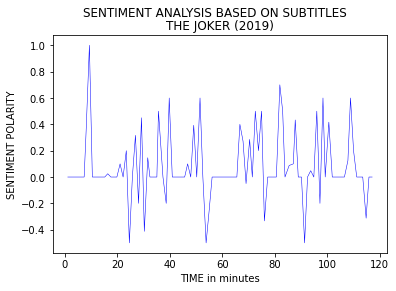

In [3]:

# Location of SRT file
file = r'./data/Iron.Man.2.2010.srt'
# Load subtitles
subs = load_srt(file)
# Fetch relevant data from the subtitles
data, time = fetch_data(subs)
# Find sentiment values and other relevant parameters to be used for plotting
time_data, sentiment_data, index = find_sentiment_for_chunks(data, time)
# Plot the data
plot_data(time_data, sentiment_data, index)

In [18]:

emotion_words = pd.read_excel('./lexicon_embeddings/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx')
# emotion_words = pd.read_excel('./lexicon_embeddings/NRC-Emotion-Lexicon/Untitled.xlsx')


In [58]:
emotion_words1 = emotion_words[['English (en)','Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Trust']]
words_list = set(pd.Series(emotion_words['English (en)']))

In [35]:
emotion_words.columns

Index(['English (en)', 'Afrikaans (af)', 'Albanian (sq)', 'Amharic (am)',
       'Arabic (ar)', 'Armenian (hy)', 'Azeerbaijani (az)', 'Basque (eu)',
       'Belarusian (be)', 'Bengali (bn)',
       ...
       'Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Trust'],
      dtype='object', length=115)

In [36]:
emotion_words1

,English (en),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14177,zone,0,0,0,0,0,0,0,0,0,0
14178,zoo,0,0,0,0,0,0,0,0,0,0
14179,zoological,0,0,0,0,0,0,0,0,0,0
14180,zoology,0,0,0,0,0,0,0,0,0,0


In [70]:
not_found_words = defaultdict(int)
total_words = 0
present_words = 0

for dialogue in data:
    dialogue = dialogue.split(" ")
    for word in dialogue:
        total_words += 1
        if word in words_list:
            present_words+=1
        else:
            not_found_words[word] += 1
 

In [97]:
a = ''
split_mins = 3
emotion_list = []

for di,ti in zip(data,time):
    a += di
    if(ti[0]%split_mins == 0):
        emotion_list += [t2e.get_emotion(a)]
        a = di      